7 encoding images found.
Encoding images loaded
(True, array([[[221, 220, 224],
        [194, 193, 197],
        [187, 191, 180],
        ...,
        [181, 187, 195],
        [180, 186, 194],
        [174, 180, 188]],

       [[218, 216, 222],
        [193, 191, 197],
        [203, 207, 207],
        ...,
        [180, 187, 192],
        [175, 183, 186],
        [170, 178, 181]],

       [[211, 211, 217],
        [198, 198, 204],
        [210, 214, 214],
        ...,
        [177, 187, 190],
        [172, 181, 181],
        [168, 177, 177]],

       ...,

       [[ 30,  18,  43],
        [ 29,  17,  42],
        [ 29,  20,  36],
        ...,
        [101,  97, 108],
        [117, 116, 125],
        [135, 134, 143]],

       [[ 29,  18,  39],
        [ 29,  18,  39],
        [ 29,  21,  32],
        ...,
        [107, 104, 113],
        [121, 118, 127],
        [133, 130, 139]],

       [[ 31,  19,  36],
        [ 32,  20,  37],
        [ 28,  24,  30],
        ...,
        [120, 115, 

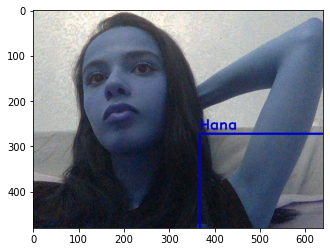

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1334: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


In [1]:
import cv2
from simple_facerec import SimpleFacerec
import matplotlib.pyplot as plt

# Encode faces from a folder
sfr = SimpleFacerec()
sfr.load_encoding_images("images/")

# Load Camera
cap = cv2.VideoCapture(0)

print(cap.read())
while True:
    ret, frame = cap.read()

    # Detect Faces
    face_locations, face_names = sfr.detect_known_faces(frame)
    for face_loc, name in zip(face_locations, face_names):
        y1, x2, y2, x1 = face_loc[0], face_loc[1], face_loc[2], face_loc[3]

        cv2.putText(frame, name,(x1, y1 - 10), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 200), 2)
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 200), 4)

    plt.imshow( frame)
    plt.show()

    key = cv2.waitKey(1)
    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()